In [43]:
import pickle #Módulo para almacenar colecciones y ficheros binarios

import scipy.stats #Contiene módulos para optimización, álgebra lineal, inegración, interpolación, funciones etc. 
import numpy as np #Librería para crear vectores y matrices
import pandas as pd #Librería para leer ficheros tipo CSV, Excel y bases de datos SQL.
pd.set_option('display.max_columns', None) #Añadir la totalidad de las columnas del dataset 
#y no distingir entre minúsculas y mayúsculas
import matplotlib as mpl #Módulo para generar gráficos
from sklearn import svm #Módulo para añadir algoritmo de clasificación y regresión
from sklearn import ensemble
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error #Módulo que incluye las métricas con las que se va a operar
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder #Módulo para el preprocesamiento (entrenamiento) de m. predictivos
from sklearn.tree import DecisionTreeClassifier #Módulo que permite entrenar árboles de decisión para problemas de 
#clasificación
from sklearn.linear_model import LinearRegression #Módulo para interpretar modelos de regresión lineal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve #Módulo para ejecutar varias
#métricas y cálculos (ejemplo: tiempos de ajuste...)
from statsmodels.tsa.statespace.sarimax import SARIMAX #Módulo para ejecutar el modelo SARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf #Módulo para ejecutar gráficos y correlaciones. 

%matplotlib inline

In [44]:
df = pd.read_csv('TGN.csv')
print("Number of rows and columns:", df.shape)
print("Column names:", list(df.columns))
df.head(3)

Number of rows and columns: (3784, 40)
Column names: ['codi_eoi', 'nom_estacio', 'data', 'magnitud', 'contaminant', 'unitats', 'tipus_estacio', 'area_urbana', 'codi_ine', 'municipi', 'codi_comarca', 'nom_comarca', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'altitud', 'latitud', 'longitud', 'geocoded_column']


,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,43148028,Tarragona (Parc de la Ciutat),2014-09-07T00:00:00.000,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,8.0,17.0,14.0,14.0,19.0,15.0,10.0,14.0,14.0,11.0,6.0,5.0,4.0,3.0,4.0,4.0,2.0,3.0,5.0,6.0,8.0,7.0,6.0,5.0,13,41.117399,1.241703,POINT (1.241703 41.117399)
1,43148028,Tarragona (Parc de la Ciutat),2014-11-16T00:00:00.000,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,20.0,19.0,12.0,19.0,13.0,5.0,5.0,4.0,5.0,11.0,7.0,5.0,5.0,6.0,6.0,6.0,9.0,16.0,29.0,29.0,60.0,57.0,48.0,35.0,13,41.117399,1.241703,POINT (1.241703 41.117399)
2,43148028,Tarragona (Parc de la Ciutat),2014-10-11T00:00:00.000,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,35.0,29.0,25.0,15.0,10.0,10.0,15.0,31.0,37.0,33.0,21.0,18.0,15.0,12.0,9.0,7.0,6.0,12.0,15.0,18.0,22.0,23.0,25.0,19.0,13,41.117399,1.241703,POINT (1.241703 41.117399)


In [45]:
df["data"] = pd.to_datetime(df["data"])
df.sort_values("data", inplace=True)
df.head(3)

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
3019,43148028,Tarragona (Parc de la Ciutat),2011-01-01,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,43.0,53.0,49.0,42.0,36.0,37.0,36.0,33.0,36.0,28.0,22.0,29.0,23.0,21.0,21.0,16.0,21.0,20.0,19.0,17.0,26.0,43.0,45.0,32.0,13,41.117399,1.241703,POINT (1.241703 41.117399)
3136,43148028,Tarragona (Parc de la Ciutat),2011-01-02,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,32.0,25.0,15.0,23.0,18.0,22.0,22.0,31.0,36.0,29.0,28.0,38.0,24.0,20.0,18.0,21.0,18.0,27.0,54.0,54.0,45.0,55.0,28.0,40.0,13,41.117399,1.241703,POINT (1.241703 41.117399)
3316,43148028,Tarragona (Parc de la Ciutat),2011-01-03,8,NO2,µg/m3,background,urban,43148,Tarragona,36,Tarragonès,13.0,11.0,18.0,18.0,16.0,19.0,29.0,38.0,43.0,36.0,34.0,35.0,44.0,28.0,20.0,22.0,27.0,52.0,57.0,52.0,54.0,53.0,52.0,52.0,13,41.117399,1.241703,POINT (1.241703 41.117399)


In [46]:
colNs_hourly_measurements = ["h%02d" % h for h in range(1,25)]
print(colNs_hourly_measurements)
df["mean_day"] = df[colNs_hourly_measurements].mean(axis=1)
df[["data", "mean_day"] + colNs_hourly_measurements].head()

['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']


,data,mean_day,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
3019,2011-01-01,31.166667,43.0,53.0,49.0,42.0,36.0,37.0,36.0,33.0,36.0,28.0,22.0,29.0,23.0,21.0,21.0,16.0,21.0,20.0,19.0,17.0,26.0,43.0,45.0,32.0
3136,2011-01-02,30.125000,32.0,25.0,15.0,23.0,18.0,22.0,22.0,31.0,36.0,29.0,28.0,38.0,24.0,20.0,18.0,21.0,18.0,27.0,54.0,54.0,45.0,55.0,28.0,40.0
3316,2011-01-03,34.291667,13.0,11.0,18.0,18.0,16.0,19.0,29.0,38.0,43.0,36.0,34.0,35.0,44.0,28.0,20.0,22.0,27.0,52.0,57.0,52.0,54.0,53.0,52.0,52.0
2990,2011-01-04,47.250000,37.0,31.0,30.0,31.0,26.0,26.0,39.0,57.0,65.0,75.0,66.0,44.0,31.0,24.0,24.0,25.0,22.0,48.0,75.0,82.0,85.0,75.0,63.0,53.0
3216,2011-01-05,49.875000,43.0,40.0,38.0,34.0,33.0,34.0,36.0,36.0,51.0,60.0,67.0,50.0,36.0,35.0,42.0,47.0,55.0,62.0,64.0,65.0,79.0,76.0,61.0,53.0


In [47]:
print("Number of rows before:", df.shape[0])
df = df[df[colNs_hourly_measurements].isna().sum(axis=1)<5]
print("Number of rows after:", df.shape[0])

Number of rows before: 3784
Number of rows after: 3695


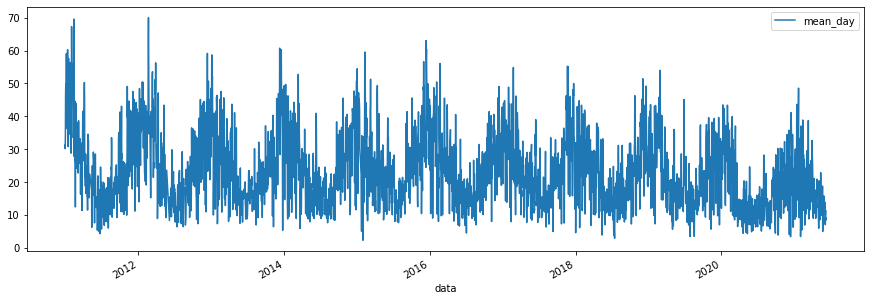

In [48]:
data = df[["data", "mean_day"]].set_index("data")
data.plot(figsize=(15, 5));

<AxesSubplot:xlabel='data'>

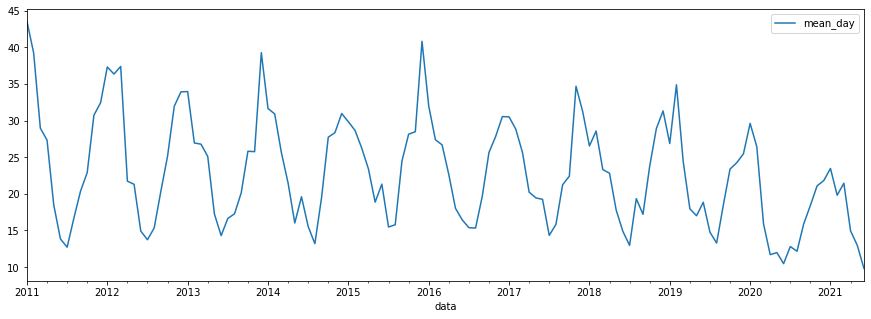

In [49]:
data = df[["data", "mean_day"]].set_index("data").resample("1M").mean()
data.plot(figsize=(15, 5))

In [50]:
date_min_test = "2018-01-01"
TEST_SIZE = len(data[data.index>=date_min_test])
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((84, 1), (84,), (42, 1), (42,))

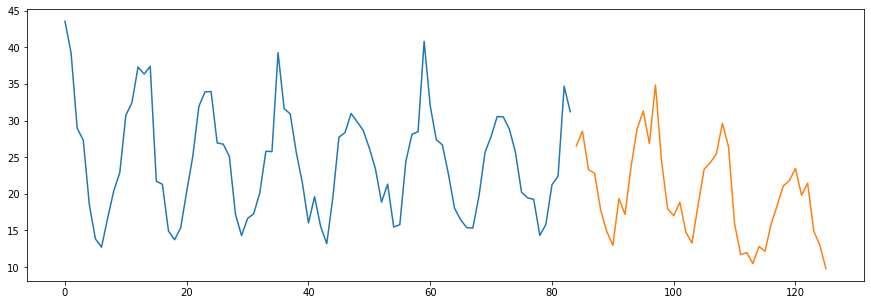

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test);

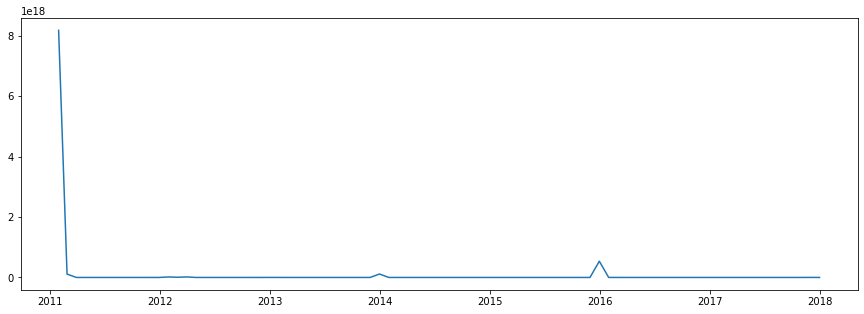

In [52]:
# transformacion exponencial
transExpo = np.exp(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(transExpo)

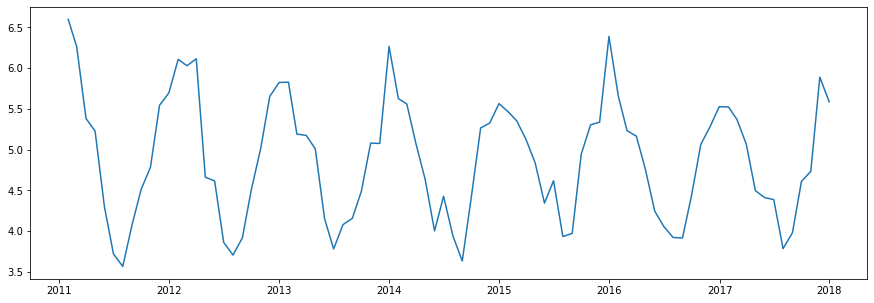

In [53]:
# transformación raiz
trnasSq = np.sqrt(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(trnasSq)

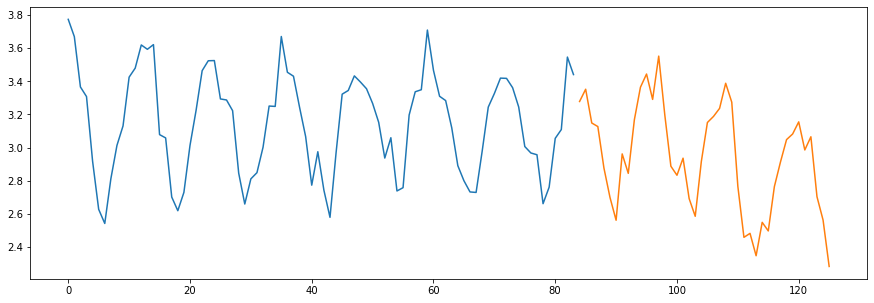

In [54]:
#transformación logaritmica 
data["log_ret"] = np.log(data['mean_day'])
data1 = data[["log_ret"]]

train, test = data1.iloc[:-TEST_SIZE], data1.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data1.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

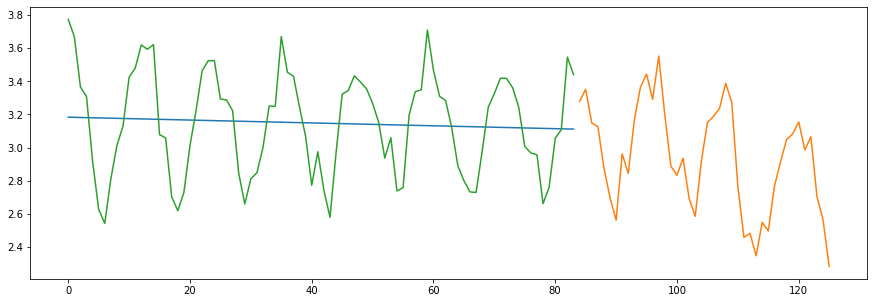

In [55]:
train = train.fillna(train.mean())
X = x_train
X = np.reshape(X, (len(X), 1))
y = train["log_ret"].tolist()

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, trend)
ax.plot(x_test, test)
ax.plot(x_train, train)

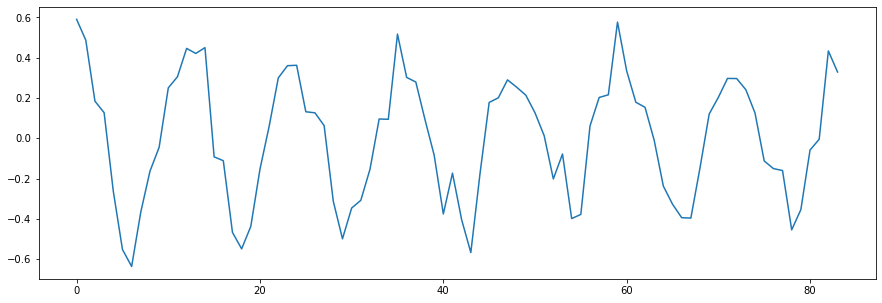

In [56]:
detrended = [y[i]-trend[i] for i in range(0, len(train))]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(detrended)

In [57]:
for i in range(1, len(train["log_ret"].tolist())-1):
    edited = detrended[i:]
    original = train["log_ret"].tolist()[:-i]
    r = np.corrcoef(edited, original)
    print("--------------------------")
    print("serie "+str(i))
    print(r)


--------------------------
serie 1
[[1.         0.75624409]
 [0.75624409 1.        ]]
--------------------------
serie 2
[[1.         0.39208538]
 [0.39208538 1.        ]]
--------------------------
serie 3
[[ 1.         -0.03319642]
 [-0.03319642  1.        ]]
--------------------------
serie 4
[[ 1.         -0.48922752]
 [-0.48922752  1.        ]]
--------------------------
serie 5
[[ 1.         -0.79526136]
 [-0.79526136  1.        ]]
--------------------------
serie 6
[[ 1.         -0.85240854]
 [-0.85240854  1.        ]]
--------------------------
serie 7
[[ 1.         -0.75797999]
 [-0.75797999  1.        ]]
--------------------------
serie 8
[[ 1.         -0.42460422]
 [-0.42460422  1.        ]]
--------------------------
serie 9
[[1.         0.03173181]
 [0.03173181 1.        ]]
--------------------------
serie 10
[[1.        0.4595617]
 [0.4595617 1.       ]]
--------------------------
serie 11
[[1.        0.7807427]
 [0.7807427 1.       ]]
--------------------------
serie 12


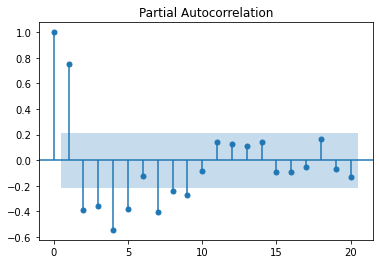

In [58]:
plot_pacf(train)
plt.show()

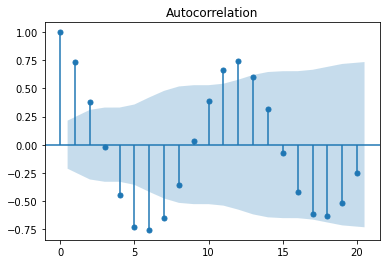

In [59]:
plot_acf(train)
plt.show()

In [60]:
my_order =(4, 0, 6)
my_seasonal_order = (4, 0, 6, 10)
model = SARIMAX(detrended, order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(4, 0, 6)x(4, 0, 6, 10)   Log Likelihood                  70.934
Date:                            Thu, 17 Jun 2021   AIC                            -99.868
Time:                                    22:53:57   BIC                            -48.821
Sample:                                         0   HQIC                           -79.347
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4629      0.554      0.835      0.404      -0.623       1.549
ar.L2          0.5958      0.556   

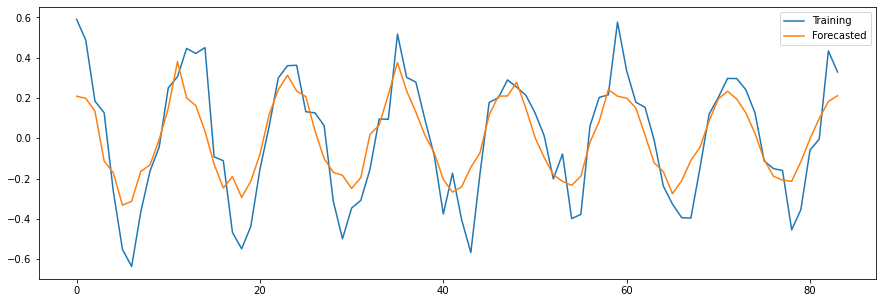

In [61]:
pred_u2 = results.get_forecast(steps=len(train))
actual = detrended
forecasted_EtEs = pred_u2.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_train, forecasted_EtEs, label="Forecasted")
ax.legend()
plt.draw()

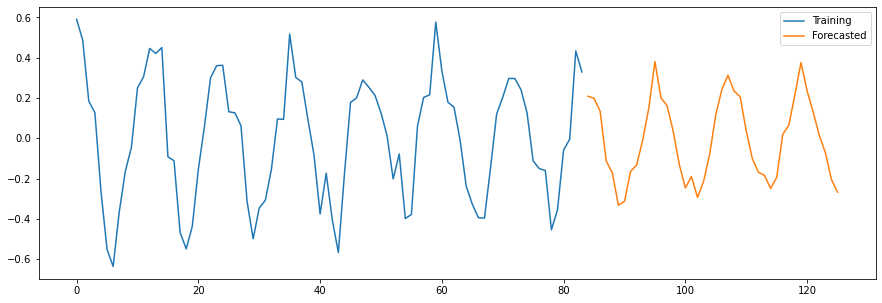

In [62]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted_last = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_test, forecasted_last, label="Forecasted")

ax.legend()
plt.show()

In [63]:
my_order =(4, 0, 6)
my_seasonal_order = (4, 0, 6, 10)
model = SARIMAX(train["log_ret"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(4, 0, 6)x(4, 0, 6, 10)   Log Likelihood                  40.214
Date:                            Thu, 17 Jun 2021   AIC                            -38.428
Time:                                    22:54:09   BIC                             12.619
Sample:                                         0   HQIC                           -17.907
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1256      0.203      5.536      0.000       0.727       1.524
ar.L2          0.0608      0.371   

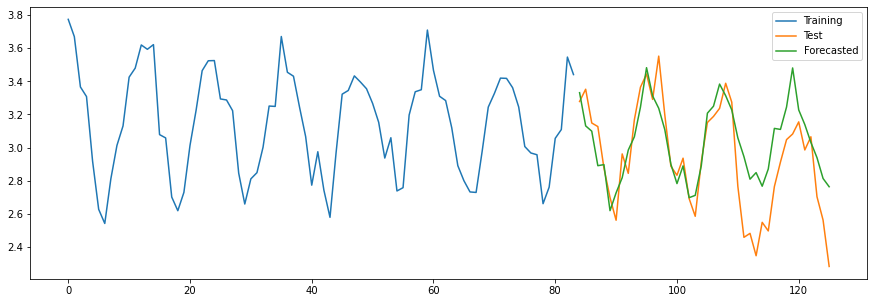

In [64]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [65]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 0.166986
R2: 0.534849


In [66]:
data2 = df[["data", "mean_day"]].set_index("data").resample("1M").mean()

train, test = data2.iloc[:-TEST_SIZE], data2.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data2.shape[0]))

my_order =(4, 0, 6)
my_seasonal_order = (4, 0, 6, 10)
model = SARIMAX(train["mean_day"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(4, 0, 6)x(4, 0, 6, 10)   Log Likelihood                -214.212
Date:                            Thu, 17 Jun 2021   AIC                            470.423
Time:                                    22:54:21   BIC                            521.470
Sample:                                         0   HQIC                           490.944
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7405      0.569      3.060      0.002       0.626       2.855
ar.L2         -0.0232      1.547   

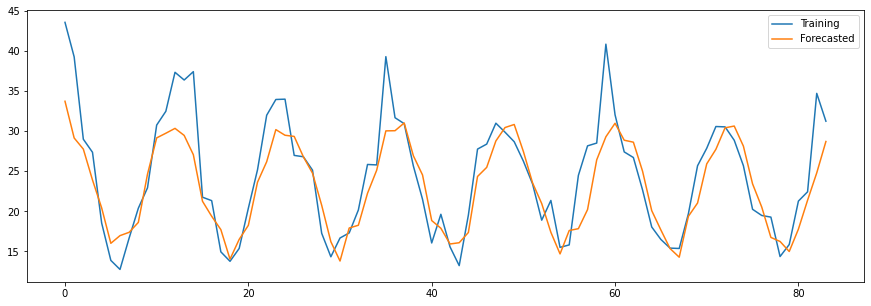

In [67]:
pred_u3 = results.get_forecast(steps=len(train))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_train, forecasted, label="Forecasted")

ax.legend()
plt.show()

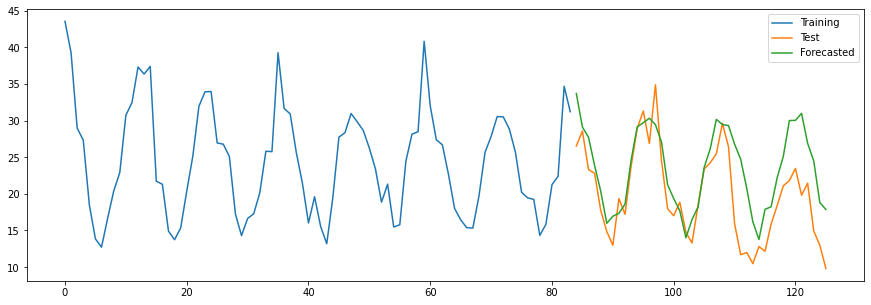

In [68]:
pred_u3 = results.get_forecast(steps=len(test))
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [69]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 4.032233
R2: 0.283051
